<img src="figs/logocimat.png" height="20%" width="20%"  align="center"/>

# <center> Ciencia de Datos<center>

<center> Víctor Muñiz Sánchez <center>
<center> Maestría en Cómputo Estadístico <center>
<center> Enero a junio 2021 <center>

# Spectral embeddings

## Ejemplo 1

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import importlib

sns.set()
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
os.chdir('/home/victor/cursos/ciencia_de_datos_2021/programs/')
from spectral_clustering import *

In [2]:
def plot_graph(X,knn_graph):    
    # crea los indices
    a, b = np.where(knn_graph>0)
    indices_temp = np.array([a,b]).T
    ix = indices_temp
    for i in range(indices_temp.shape[0]):
        test_elem = indices_temp[i,]
        temp = np.sum(np.isin(indices_temp,test_elem),axis=1)
        ix[temp==2,] = test_elem
        
    indices = np.unique(ix,axis=0)

    data_toy = pd.DataFrame(X)
    data_toy.columns = ['x1','x2']  
    data_toy = pd.DataFrame(data_toy).assign(cl = y)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.scatterplot(x='x1', y='x2', data = data_toy, s=150)
    #for i in range(X.shape[0]):
    #    plt.text(X[i,0], X[i,1]+.1, i)
    
    for i in range(indices.shape[0]):
        coords = np.array([X[indices[i,0],:], X[indices[i,1],:]])
        #sns.lineplot(coords.T[0,], coords.T[1,], color='black',ax=ax)
        plt.plot(coords.T[0,], coords.T[1,], color='black')


Text(0.5, 1.0, 'Datos sintéticos')

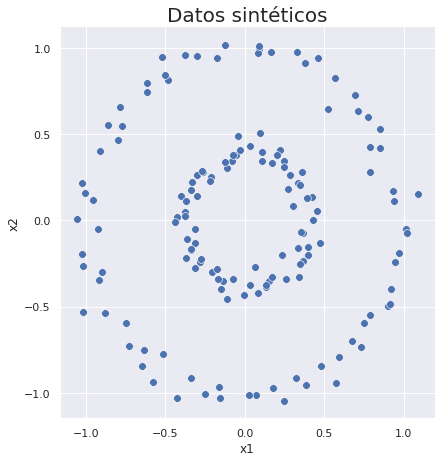

In [3]:
ndata = 150
X, y, custom_palette, kclust = get_dataset('dona', ndata)

data_toy = pd.DataFrame(X)
data_toy.columns = ['x1','x2']
data_toy = pd.DataFrame(data_toy).assign(cl = y)
sns.relplot(x='x1', y='x2', data = data_toy, palette=custom_palette, s=60, height=6)
plt.title('Datos sintéticos', fontsize=20)


### Parámetros para clústering espectral

In [4]:
knn = 8 # k-vecinos cercanos para la construcción del grafo
sigma = 1.5 # sigma del Kernel Gaussiano
lflag = 'rw' # Tipo de Laplaciano

### Realiza el embedding de los datos según el Laplaciano inducido por el grafo construido

In [5]:
indices, knn_graph = graph(X,knn,mutual=False)
W = adjacency_matrix(X, knn_graph, sigma, True)
L, D = laplacian(W, flag=lflag)
vals, vecs, vecs_k = eigen_Lap(L,kclust,lflag)

### El grafo creado

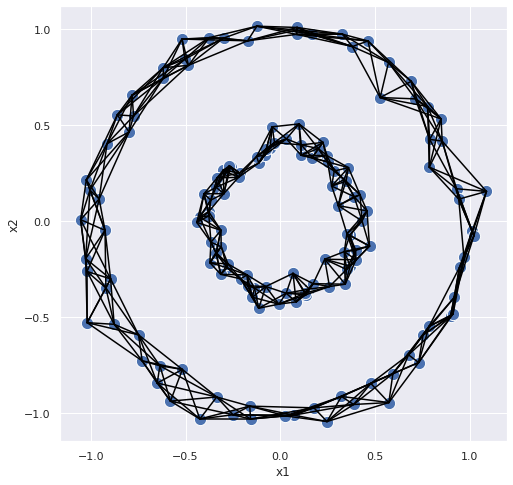

In [6]:
plot_graph(X,knn_graph)

Detalle con el grafo. Cuando usamos $k-$nn induce un grafo dirigido, por lo tanto, no es simétrico. Dos formas de solucionarlo es:
- ignorar las direcciones y considerar conexiones simétricas
- conexiones mútuas

### Matriz de Adyacencias o Afinidad

<AxesSubplot:>

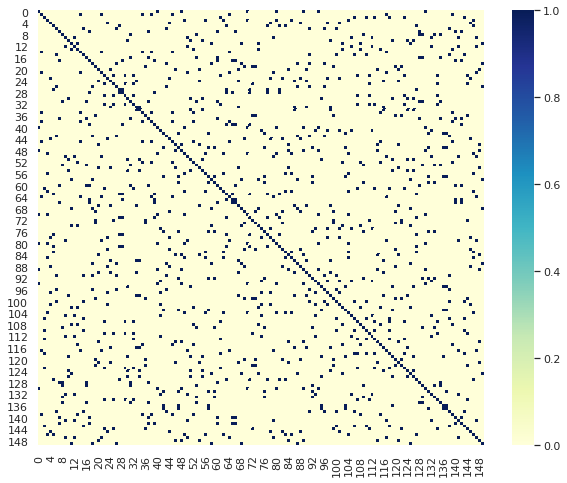

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(knn_graph, cmap="YlGnBu")

#### Matriz de adyacencias (afinidad) sin pesos. Solo muestra los componentes están conectados

<AxesSubplot:>

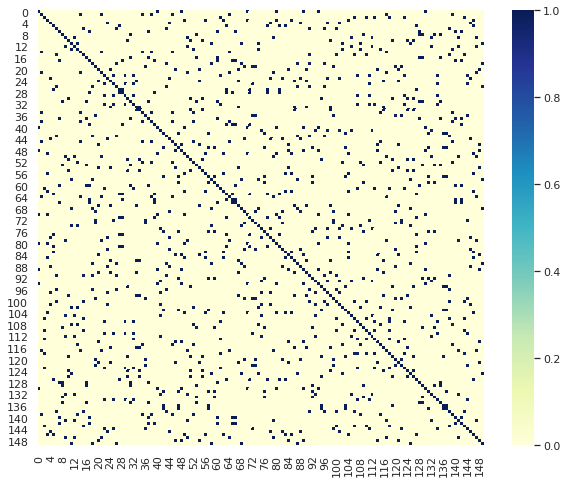

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(W, cmap="YlGnBu")

#### Matriz de adyacencias (afinidad) pesada usando distancia Gaussiana, es decir, con pesos $w_{i,j}=e^{\frac{-\Vert \mathbf{x}_i-\mathbf{x}_j \Vert^2}{2\sigma^2}}$ si $\mathbf{x}_i$ y $\mathbf{x}_j$ se conectan.

### Análisis espectral. Observa el tipo de Laplaciano que usamos ($L$, $L_{\text{sym}}$ ó $L_{\text{rw}}$)

<AxesSubplot:title={'center':'eigenvector 5'}, xlabel='x1', ylabel='x2'>

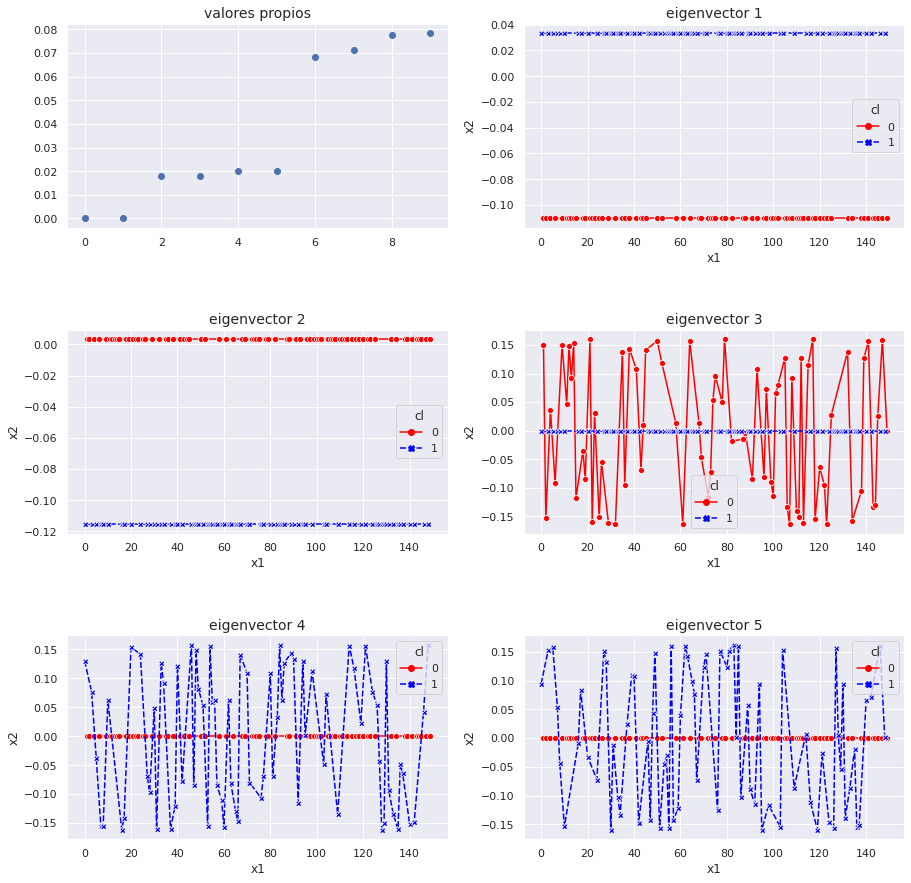

In [9]:
nv = 10
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = .5)
fig.add_subplot(321)
plt.title('valores propios', fontsize=14)
plt.scatter(range(nv),vals[:nv])
fig.add_subplot(322)
plt.title('eigenvector 1', fontsize=14)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,0],cl=y))
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette, legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(323)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,1],cl=y))
plt.title('eigenvector 2', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(324)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,2],cl=y))
plt.title('eigenvector 3', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(325)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,3],cl=y))
plt.title('eigenvector 4', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(326)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,4],cl=y))
plt.title('eigenvector 5', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)

### Finalmente, realizamos $k-$means con el embedding obtenido

<AxesSubplot:title={'center':'Original'}, xlabel='x1', ylabel='x2'>

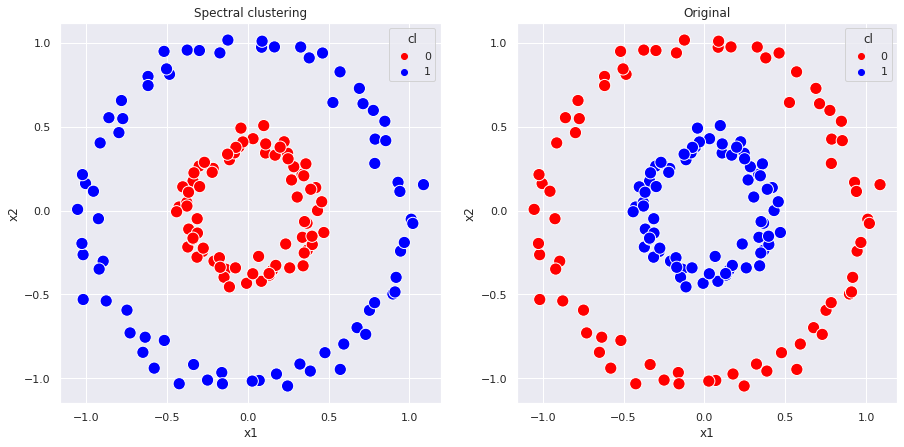

In [10]:
# kmeans
kmeans = cluster.KMeans(n_clusters=kclust, init='random',random_state=0)
y_km = kmeans.fit_predict(vecs_k)
data_km = pd.DataFrame(dict(x1=X[:,0],x2=X[:,1],cl = y_km))

fig = plt.figure(figsize=(15,7))
fig.add_subplot(121)
plt.title('Spectral clustering')
sns.scatterplot(x='x1', y='x2', data = data_km, hue='cl', s=150, 
            palette = custom_palette,legend = 'brief')
fig.add_subplot(122)
plt.title('Original')
sns.scatterplot(x='x1', y='x2', hue = 'cl', data = data_toy, palette=custom_palette, s=150)

- MENCIONAR LOS DETALLES DE LAS GRAFICAS DE ADYACENCIA, SOBRE TODO LAS FULL CONNECTED CON KERNEL GAUSSIANO
  Y COMO SE RELACIONAN EN SKLEARN CON LAS K-NEIGHBOR
- MOSTRAR EJEMPLO ESPIRALES
- MOSTRAR IMPLEMENTACION SKLEARN Y COMPARARLO CON LA IMPLEMENTACION SEGUN LA MATRIZ DE AFINIDAD (KNN O KERNEL)
- MOSTRAR EL CONCEPTO DE EMBEDDING CON EL PAIRSPLOT DE EIGENVECTORES
- MOSTRAR SPECTRAL EMBEDDING DE SKLEARN
- MOSTRAR EJEMPLO IMAGENES

## Ejemplo 2

Text(0.5, 1, 'Datos sintéticos')

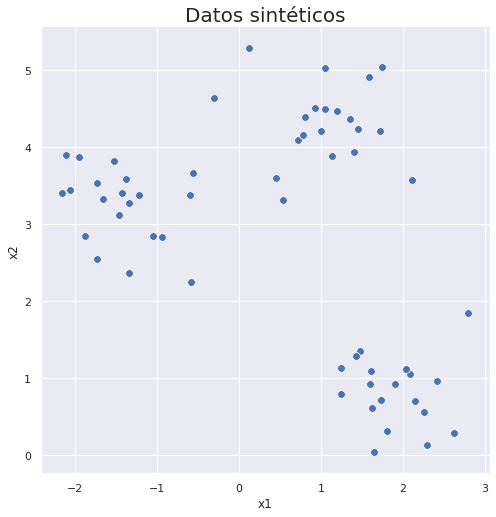

In [50]:
ndata = 60
X, y, custom_palette, kclust = get_dataset('blobs', ndata)

data_toy = pd.DataFrame(X)
data_toy.columns = ['x1','x2']
data_toy = pd.DataFrame(data_toy).assign(cl = y)
sns.relplot(x='x1', y='x2', data = data_toy, palette=custom_palette, height=7, s=60)
plt.title('Datos sintéticos', fontsize=20)

### Parámetros para clústering espectral

In [23]:
knn = 15 # k-vecinos cercanos para la construcción del grafo
sigma = 1.5 # sigma del Kernel Gaussiano
lflag = 'rw' # Tipo de Laplaciano

### Realiza el embedding de los datos según el Laplaciano inducido por el grafo construido

In [24]:
indices, knn_graph = graph(X,knn,mutual=False)
W = adjacency_matrix(X, knn_graph, sigma, True)
L, D = laplacian(W, flag=lflag)
vals, vecs, vecs_k = eigen_Lap(L,kclust,lflag)

### El grafo creado

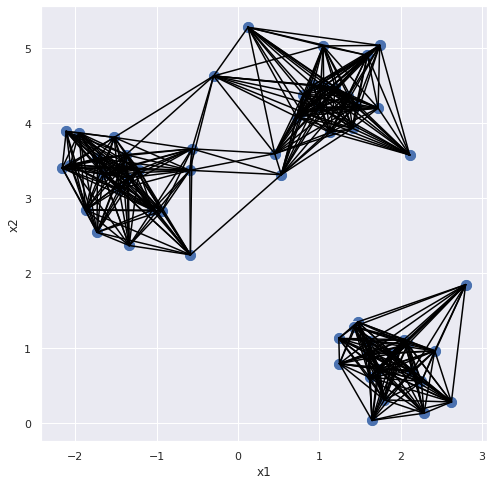

In [25]:
plot_graph(X,knn_graph)

### Matriz de Adyacencias o Afinidad

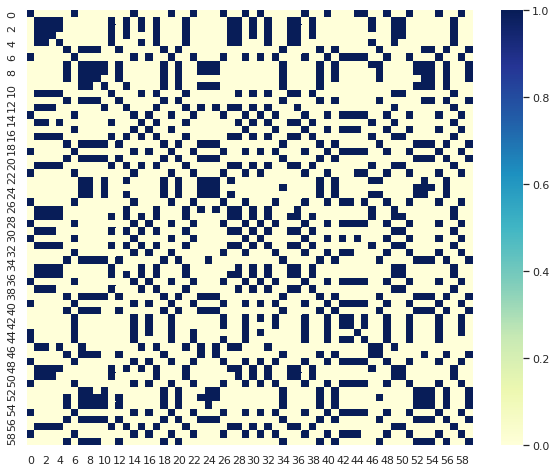

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(knn_graph, cmap="YlGnBu")

#### Matriz de adyacencias (afinidad) sin pesos. Solo muestra los componentes están conectados

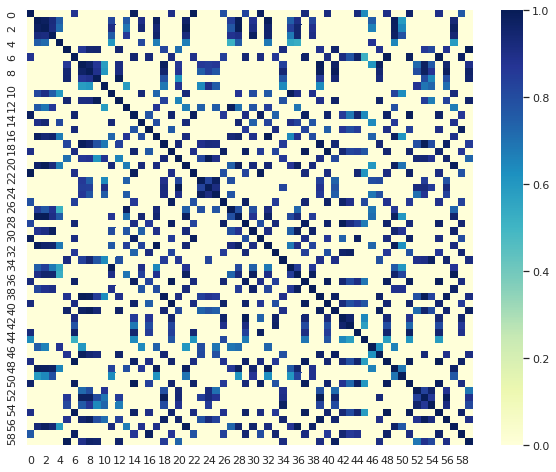

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(W, cmap="YlGnBu")

#### Matriz de adyacencias (afinidad) pesada usando distancia Gaussiana, es decir, con pesos $w_{i,j}=e^{\frac{-\Vert \mathbf{x}_i-\mathbf{x}_j \Vert^2}{2\sigma^2}}$ si $\mathbf{x}_i$ y $\mathbf{x}_j$ se conectan.

### Análisis espectral. Observa el tipo de Laplaciano que usamos ($L$, $L_{\text{sym}}$ ó $L_{\text{rw}}$)

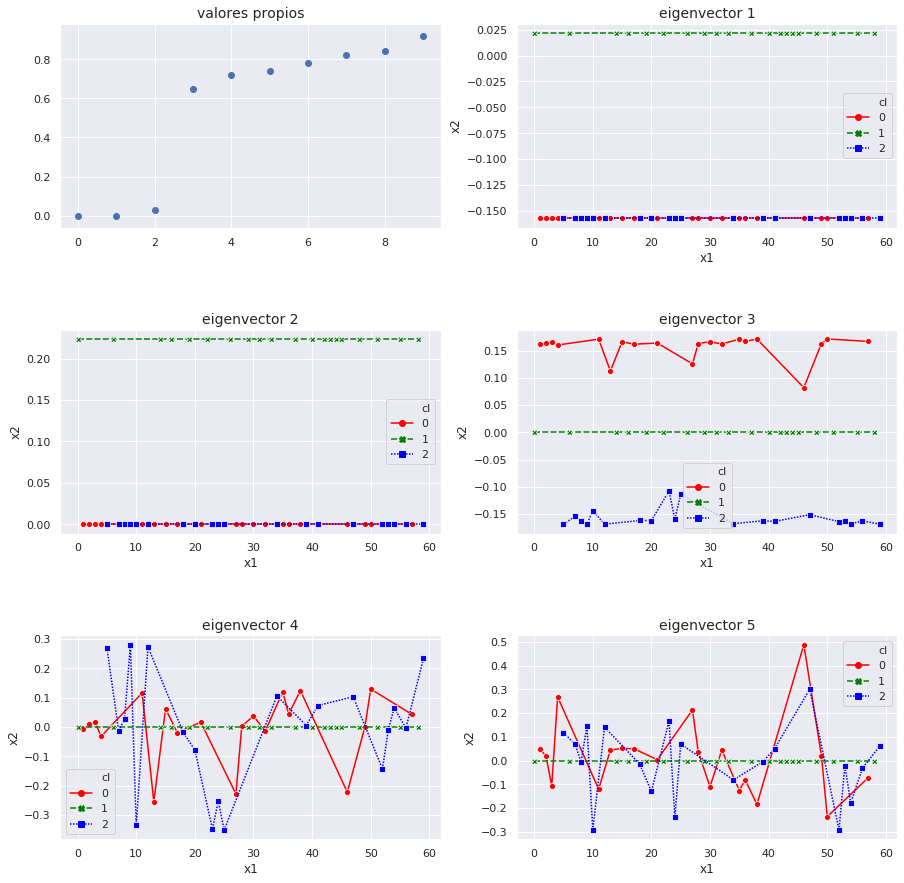

In [28]:
nv = 10
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = .5)
fig.add_subplot(321)
plt.title('valores propios', fontsize=14)
plt.scatter(range(nv),vals[:nv])
fig.add_subplot(322)
plt.title('eigenvector 1', fontsize=14)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,0],cl=y))
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette, legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(323)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,1],cl=y))
plt.title('eigenvector 2', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(324)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,2],cl=y))
plt.title('eigenvector 3', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(325)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,3],cl=y))
plt.title('eigenvector 4', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(326)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,4],cl=y))
plt.title('eigenvector 5', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)

### Finalmente, realizamos $k-$means con el embedding obtenido

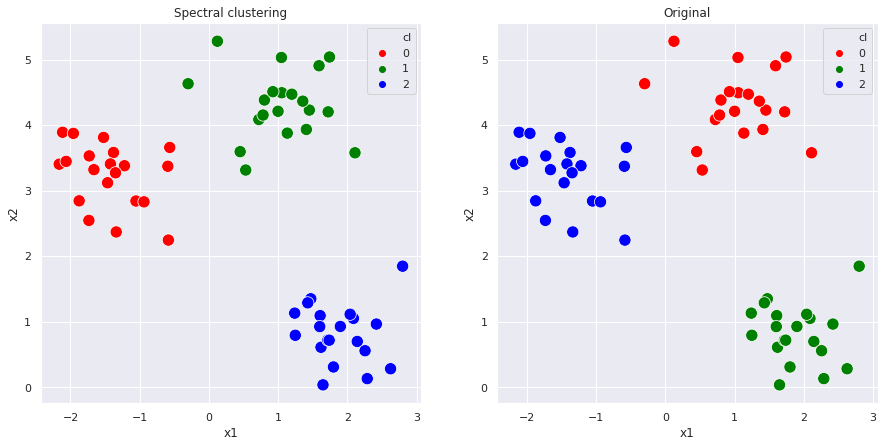

In [29]:
# kmeans
kmeans = cluster.KMeans(n_clusters=kclust, init='random',random_state=0)
y_km = kmeans.fit_predict(vecs_k)
data_km = pd.DataFrame(dict(x1=X[:,0],x2=X[:,1],cl = y_km))

fig = plt.figure(figsize=(15,7))
fig.add_subplot(121)
plt.title('Spectral clustering')
sns.scatterplot(x='x1', y='x2', data = data_km, hue='cl', s=150, 
            palette = custom_palette,legend = 'brief')
fig.add_subplot(122)
plt.title('Original')
sns.scatterplot(x='x1', y='x2', hue = 'cl', data = data_toy, palette=custom_palette, s=150)

## Ejemplo 3

Text(0.5, 1.0, 'Datos sintéticos')

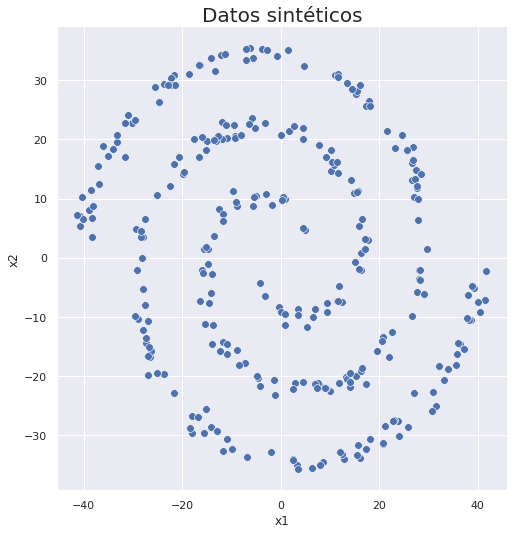

In [11]:
ndata = 150
X, y, custom_palette, kclust = get_dataset('spirals', ndata)

data_toy = pd.DataFrame(X)
data_toy.columns = ['x1','x2']
data_toy = pd.DataFrame(data_toy).assign(cl = y)
sns.relplot(x='x1', y='x2', data = data_toy, palette=custom_palette, height=7, s=60)
plt.title('Datos sintéticos', fontsize=20)

### Parámetros para clústering espectral

In [36]:
knn = 10 # k-vecinos cercanos para la construcción del grafo
sigma = 1.5 # sigma del Kernel Gaussiano
lflag = 'rw' # Tipo de Laplaciano

### Realiza el embedding de los datos según el Laplaciano inducido por el grafo construido

In [37]:
indices, knn_graph = graph(X,knn,mutual=False)
W = adjacency_matrix(X, knn_graph, sigma, True)
L, D = laplacian(W, flag=lflag)
vals, vecs, vecs_k = eigen_Lap(L,kclust,lflag)

### El grafo creado

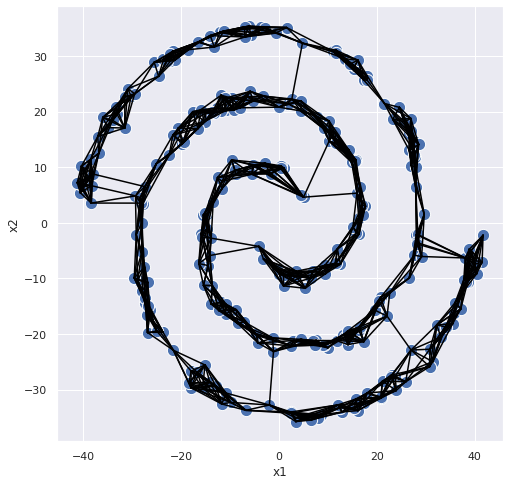

In [38]:
plot_graph(X,knn_graph)

### Matriz de Adyacencias o Afinidad

<AxesSubplot:>

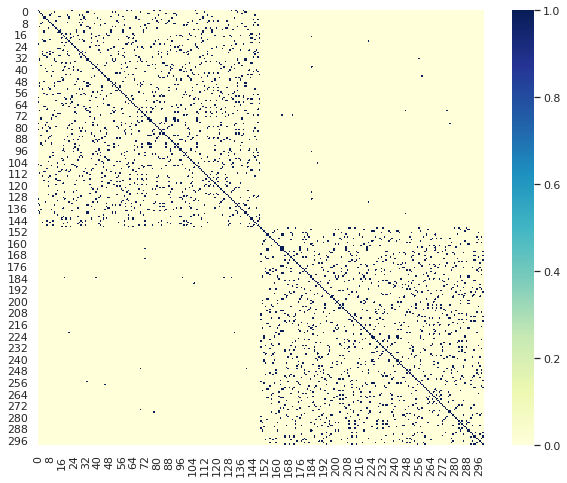

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(knn_graph, cmap="YlGnBu")

#### Matriz de adyacencias (afinidad) sin pesos. Solo muestra los componentes están conectados

<AxesSubplot:>

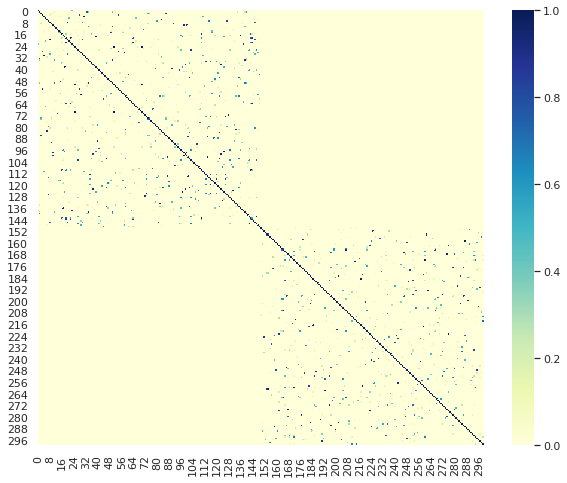

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(W, cmap="YlGnBu")

#### Matriz de adyacencias (afinidad) pesada usando distancia Gaussiana, es decir, con pesos $w_{i,j}=e^{\frac{-\Vert \mathbf{x}_i-\mathbf{x}_j \Vert^2}{2\sigma^2}}$ si $\mathbf{x}_i$ y $\mathbf{x}_j$ se conectan.

### Análisis espectral. Observa el tipo de Laplaciano que usamos ($L$, $L_{\text{sym}}$ ó $L_{\text{rw}}$)

<AxesSubplot:title={'center':'eigenvector 5'}, xlabel='x1', ylabel='x2'>

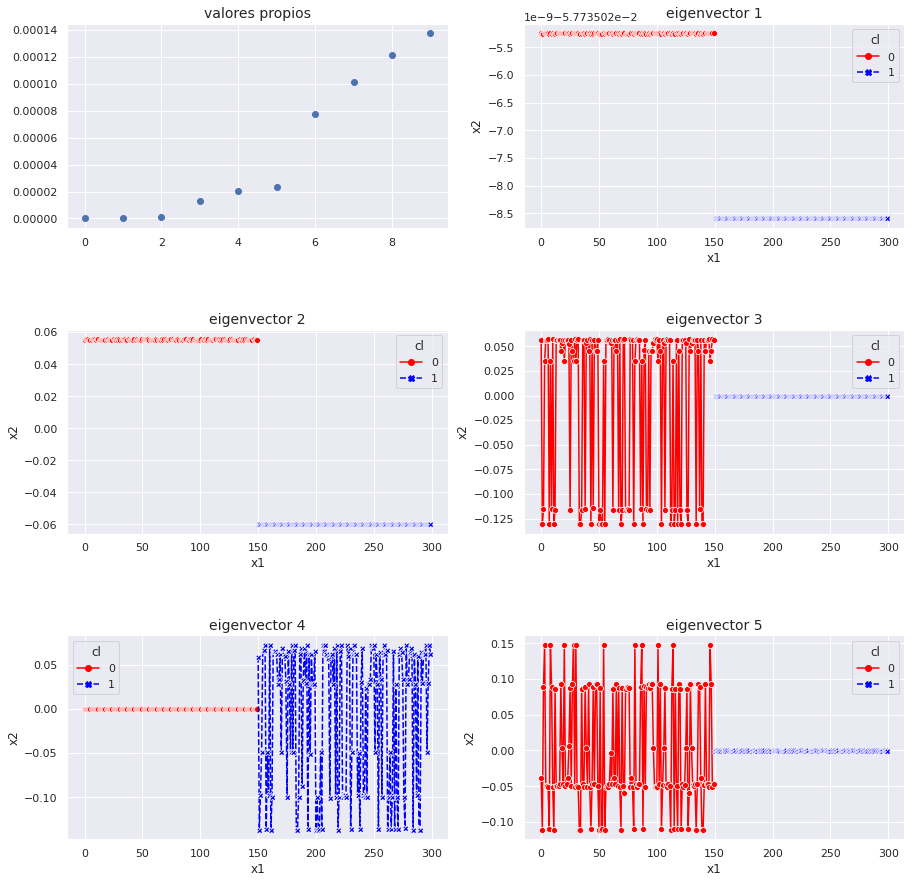

In [41]:
nv = 10
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = .5)
fig.add_subplot(321)
plt.title('valores propios', fontsize=14)
plt.scatter(range(nv),vals[:nv])
fig.add_subplot(322)
plt.title('eigenvector 1', fontsize=14)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,0],cl=y))
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette, legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(323)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,1],cl=y))
plt.title('eigenvector 2', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(324)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,2],cl=y))
plt.title('eigenvector 3', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(325)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,3],cl=y))
plt.title('eigenvector 4', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(326)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,4],cl=y))
plt.title('eigenvector 5', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)

### Finalmente, realizamos $k-$means con el embedding obtenido

<AxesSubplot:title={'center':'Original'}, xlabel='x1', ylabel='x2'>

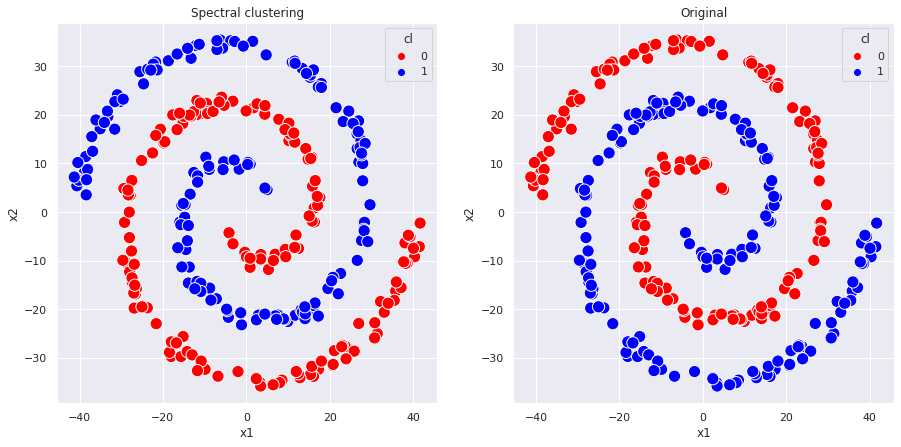

In [42]:
# kmeans
kmeans = cluster.KMeans(n_clusters=kclust, init='random',random_state=0)
y_km = kmeans.fit_predict(vecs_k)
data_km = pd.DataFrame(dict(x1=X[:,0],x2=X[:,1],cl = y_km))

fig = plt.figure(figsize=(15,7))
fig.add_subplot(121)
plt.title('Spectral clustering')
sns.scatterplot(x='x1', y='x2', data = data_km, hue='cl', s=150, 
            palette = custom_palette,legend = 'brief')
fig.add_subplot(122)
plt.title('Original')
sns.scatterplot(x='x1', y='x2', hue = 'cl', data = data_toy, palette=custom_palette, s=150)

## ¿Cómo es el `embedding`? La representación de nuestros datos inducido por el Laplaciano.

In [43]:
data_vecs = pd.DataFrame(np.hstack((vecs[:,:5],y.reshape([y.shape[0],1]))))
data_vecs.columns = ['e1','e2','e3','e4','e5','cl']

### El embedding está dado por los vectores propios asociados a los valores propios más pequeños...

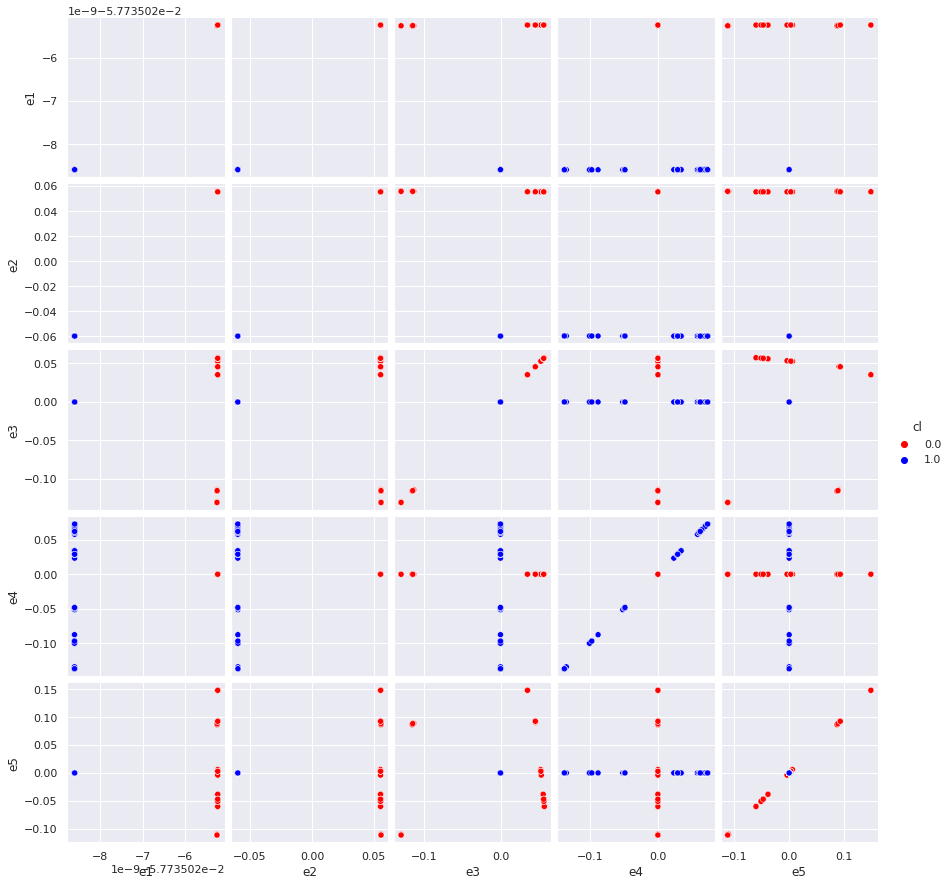

In [44]:
sns.pairplot(data_vecs,diag_kind=None, hue='cl', palette = custom_palette, kind='scatter')

## Spectral Clustering con `sklearn`

In [51]:
#aff = 'nearest_neighbors'
aff = 'rbf'
n_neigh = knn
sig = 1./sigma 
model = cluster.SpectralClustering(n_clusters=kclust,eigen_solver='arpack',
                                   affinity = aff, gamma = sig, n_neighbors = n_neigh).fit(X)

y_sc = model.labels_

La función es `SpectralClustering`, del módulo `cluster` de `sklearn`. Tenemos varias opciones para la matriz de afinidades, principalmente:
    - nearest_neighbors
    - rbf
    - precomputed
Checa la ayuda...

### Matriz de Afinidades

<AxesSubplot:>

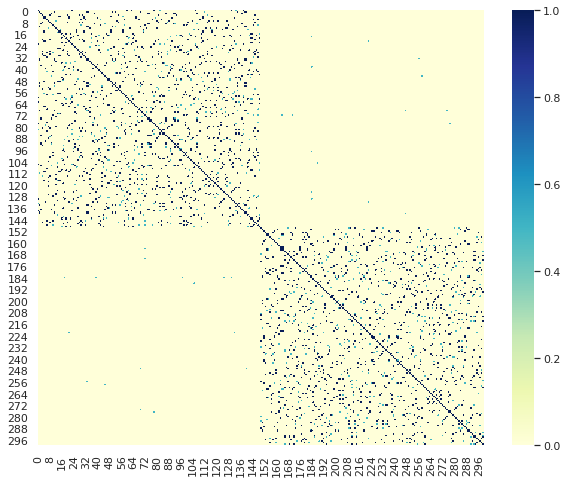

In [49]:
if aff == 'nearest_neighbors':
    w = model.affinity_matrix_.toarray()
else:
    w = model.affinity_matrix_

plt.figure(figsize=(10,8))
sns.heatmap(w, cmap="YlGnBu")

Text(0.5, 1.0, 'Spectral Clustering')

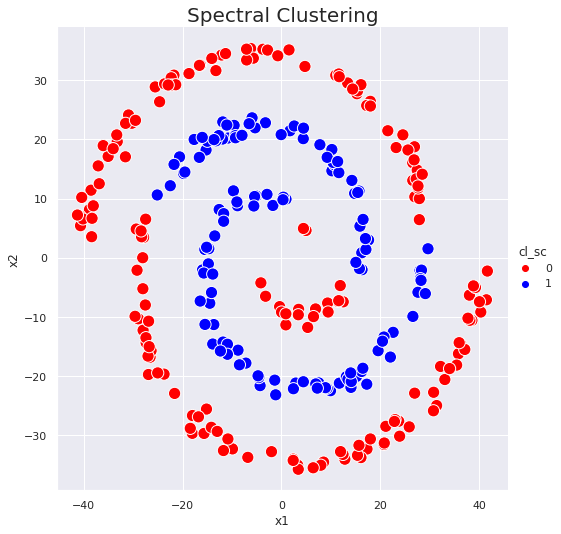

In [52]:
data_sc = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], cl_sc = y_sc))
sns.relplot(x='x1', y='x2', data = data_sc, hue='cl_sc', height=7, palette = custom_palette, 
            s = 150)
plt.title('Spectral Clustering', fontsize=20)

## El embedding con `SpectralEmbedding` de `sklearn.manifold`

<AxesSubplot:>

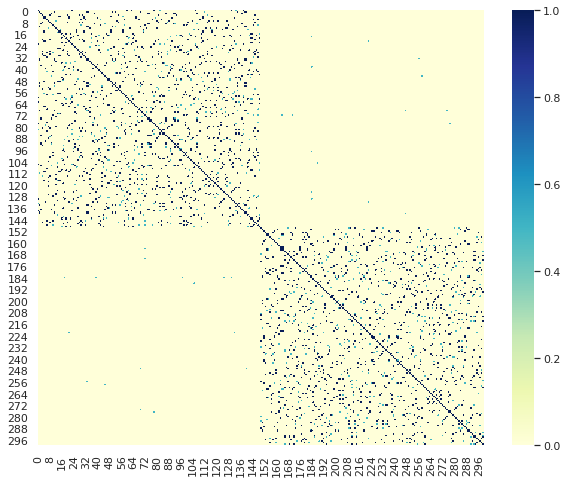

In [53]:
from sklearn.manifold import SpectralEmbedding

model2 = SpectralEmbedding(n_components=4,affinity='nearest_neighbors',gamma=sigma,eigen_solver='arpack',
                           n_neighbors=knn).fit(X)

plt.figure(figsize=(10,8))
w2 = model2.affinity_matrix_.toarray()
sns.heatmap(w2, cmap="YlGnBu")

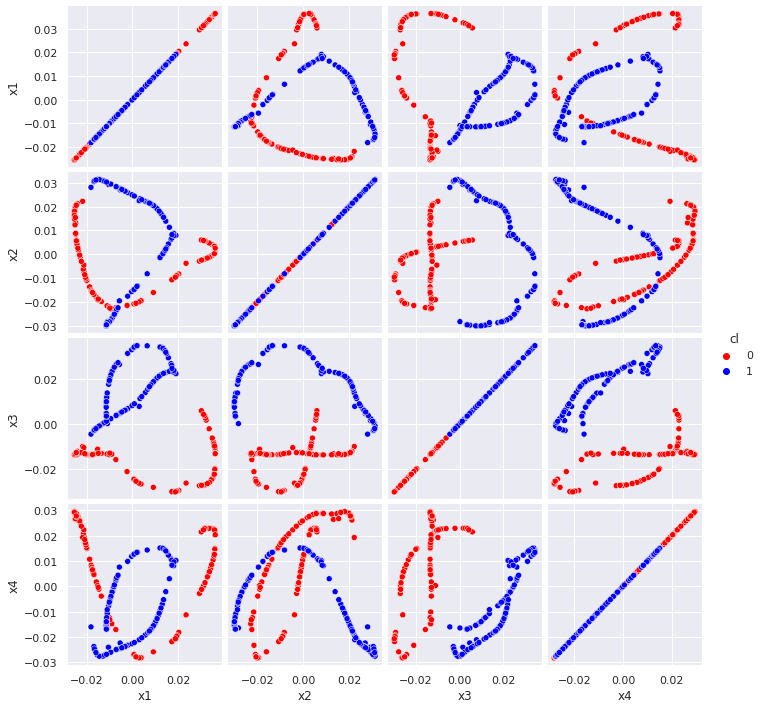

In [54]:
data_vecs_se = pd.DataFrame(dict(x1=model2.embedding_[:,0],x2=model2.embedding_[:,1],
                                 x3=model2.embedding_[:,2],x4=model2.embedding_[:,3],cl=y))
sns.pairplot(data_vecs_se,diag_kind=None, hue='cl', palette = custom_palette, kind='scatter')